**this version code trying to tokenize the keyword and categorized them for future analysis**
**Starting from the csv file download from 


In [1]:
# import the necessary libraries
import pandas as pd
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import re

In [2]:
#get the tweet data from 
df_tweets = pd.read_csv('data/trump-tweet-in-office.csv')

In [3]:

#df_tweets.describe()
print('total tweets', len(df_tweets))
df_tweets.head()

total tweets 11568


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @RepLeeZeldin: This impeachment inquiry has...,10-25-2019 02:10:02,8819,0,True,1187551862616141824
1,Twitter for iPhone,RT @RepDougCollins: Democrats have no concern ...,10-25-2019 02:08:26,13713,0,True,1187551461808492544
2,Twitter for iPhone,RT @RepGosar: The only reason Adam Schiff is c...,10-25-2019 02:08:24,10961,0,True,1187551451775750144
3,Twitter for iPhone,RT @RepArrington: Let's call this sham what it...,10-25-2019 02:07:49,4547,0,True,1187551305281212416
4,Twitter for iPhone,RT @RepMattGaetz: Democrats are trying to use ...,10-25-2019 02:07:37,10491,0,True,1187551256371515392


In [4]:
#explore the trade data
cols = df_tweets.columns
print(cols)
count = len(df_tweets)


Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count', 'is_retweet', 'id_str'], dtype='object')


print(re.sub(r'(.*)\1', r'\1', "HeyHey")) 
word_list =['just','@(\w+)\W']
pt='@(\w+)\W'
text ='Great news. We are only just beginning. @RepCummings today at the @WhiteHouse. Great discussion!'
for word in word_list:
    print(word)
    text= re.sub(word, r' ', text)
print(text)

In [5]:
#identify retweets 
def grep_ref_tweet_ids(text):
    clean_text = text
    ref_tweet_ids=[]
    ref_tweet_ids = re.findall(r'@(\w+)\W',text)
    #clean_text= re.sub(r'@(\w+)\W', r' ', text)
    return ref_tweet_ids, clean_text

ref_tweet_ids, clean_text =grep_ref_tweet_ids('Great news. We are only just beginning. @RepCummings today at the @WhiteHouse. Great discussion!')
print(ref_tweet_ids, clean_text)


['RepCummings', 'WhiteHouse'] Great news. We are only just beginning. @RepCummings today at the @WhiteHouse. Great discussion!


In [6]:
#identify keywords mentioned in the tweet  
def grep_keymark_tags(text):
    ref_hash_tags=[]
    ref_hash_tags = re.findall(r'#([\w]{3,})\W',text)
    clean_text= text #re.sub(r'#([\w]{3,})\W', r' ', text)
    return ref_hash_tags, clean_text

ref_hash_tags, clean_text =grep_keymark_tags('RT @NHC_Atlantic: Beyond Hurricane #Dorian and TS #Gabrielle were monitoring 3 other disturbances with a low chance of becoming tropical…')
print(ref_hash_tags, clean_text)


['Dorian', 'Gabrielle'] RT @NHC_Atlantic: Beyond Hurricane #Dorian and TS #Gabrielle were monitoring 3 other disturbances with a low chance of becoming tropical…


In [7]:
#identify the referenced links in the tweet, need to find out what need to be done on this
#
def grep_ref_https_link(text):
    ref_http_links=[]
    ref_http_links=[]
    ref_http_links = re.findall(r'(https?://[\w\.\/]+)\W',text)
    clean_text=text
    return ref_http_links, clean_text
ref_http_links, clean_text =grep_ref_https_link('U.S. Consumer Comfort Just Reached Its Highest Level in a Decade ➡️https://t.co/S8nZgmeMMV https://t.co/xC0piRa6eP ')
print(ref_http_links, clean_text)

['https://t.co/S8nZgmeMMV', 'https://t.co/xC0piRa6eP'] U.S. Consumer Comfort Just Reached Its Highest Level in a Decade ➡️https://t.co/S8nZgmeMMV https://t.co/xC0piRa6eP 


In [8]:
#stripping of stop words for later tokenizers
#
def stripoff_stop_words(text, word_list):
    clean_text = text
    for stop_wd in word_list:
        clean_text= text #re.sub(r'#([\w]{3,})\W', r' ', text)
    return clean_text 


In [9]:
token_stop_words=['the','at','in','of','off','after','below','under','above','before'
            ,'a','an','those','these','that','this'
            ,'he','she','we','they','us','them','our','your','his','her']
keytags_politics_partisans =['hilary','wall','immigration','Nancy Pelsi','dem\W','dem party','impeach'
                             ,'fake news']
keytags_foreign_policys =['Nato\W','israel','israel','Saudi\W','iran\W','iraq\W','middel east','Russia'
                          ,'japan','korean','kim ju']
keytags_trade_war =['tpp','currency manipulate|currency manipulation','wto','unfair[\w\W]+trade'
                    ,'trade deficits','trade deal','china[\w\W]+trade','trade','china','tariff'
                    ,'american[\w\W]+manufac','american first']
redtags_trade_war =['currency manipulate|currency manipulation','trade deal','trade deficits','china[\w\W]+tariff','tariff','unfair[\w\W]+trade']


In [56]:
trade_tags_all = []
trade_flag=[]
politics_tags=[]
counter=0
for i in range(len(df_tweets)) :
    #print(i)
    trade_tag =[]
    tweet_text = df_tweets.iloc[i,1]
    #test all trade related tweets    
    #for tag in keytags_trade_war:
    #test trade war explicit intimitation
    for tag in keytags_trade_war:  #redtags_trade_war:
        trade_tag = trade_tag + re.findall(tag,tweet_text)
    #for tag in keytags_foreign_policys:  #redtags_trade_war:
    #    trade_tag = trade_tag + re.findall(tag,tweet_text)
    trade_tags_all.append(trade_tag)
    if len(trade_tag)>0:
        counter +=1
        #print(i, trade_tag)
        #print(tweet_text)
print(counter)

151


In [57]:

df_tweets_padded = df_tweets.copy()
df_tweets_padded['tradetag']=trade_tags_all
#df_tweets_padded.head()



In [58]:
df_tweets_trade_flagged = df_tweets_padded.loc[df_tweets_padded['tradetag'].str.len()>0 ]
#df_tweets_trade_flagged.head()
df_tweets_trade_flagged['created_at'] =  pd.to_datetime(df_tweets_trade_flagged['created_at']).dt.date
df_tweets_trade_flagged.describe()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,retweet_count,favorite_count,id_str
count,151.000000,151.000000,1.510000e+02
mean,17645.456954,69721.443709,1.029521e+18
std,8206.645416,42185.550631,1.009488e+17
min,2806.000000,0.000000,8.246158e+17
25%,12209.500000,49917.500000,9.719849e+17
50%,17197.000000,77659.000000,1.011571e+18
75%,22067.000000,96337.500000,1.128743e+18
max,46856.000000,176652.000000,1.186860e+18


In [60]:

df_SPX = pd.read_csv('data/GSPC.csv')
df_SPX['Date'] = pd.to_datetime(df_SPX['Date']).dt.date
display(df_SPX.head())
display(df_SPX.describe())
#df_SPX_dn





,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-20,2269.959961,2276.959961,2265.010010,2271.310059,2271.310059,3524970000
1,2017-01-23,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3152710000
2,2017-01-24,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3810960000
3,2017-01-25,2288.879883,2299.550049,2288.879883,2298.370117,2298.370117,3846020000
4,2017-01-26,2298.629883,2300.989990,2294.080078,2296.679932,2296.679932,3610360000


,Open,High,Low,Close,Adj Close,Volume
count,697.000000,697.000000,697.000000,697.000000,697.000000,6.970000e+02
mean,2682.767102,2693.957344,2670.310731,2682.893888,2682.893888,3.521539e+09
std,201.000998,202.313275,199.377846,200.660956,200.660956,5.920516e+08
min,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,1.349780e+09
25%,2497.260010,2507.159912,2490.370117,2500.229980,2500.229980,3.192510e+09
50%,2714.989990,2730.600098,2698.750000,2712.969971,2712.969971,3.437620e+09
75%,2846.199951,2858.679932,2830.939941,2847.110107,2847.110107,3.770520e+09
max,3024.469971,3027.979980,3014.300049,3025.860107,3025.860107,7.609010e+09


In [61]:

#df_SPX['vo']
df_SPX_volatile = df_SPX.loc[(df_SPX['High']-df_SPX['Low'])/df_SPX['Close']>=0.005 ]
df_SPX_up_dn = df_SPX.loc[abs((df_SPX['Open']-df_SPX['Close'])/df_SPX['Close'])>=0.003]
print(len(df_SPX))
print(len(df_tweets_trade_flagged))
print(len(df_SPX_volatile))
print(len(df_SPX_up_dn))


697
151
469
326


In [62]:
#df_tweets_trade_flagged['created_at'])
df_SPX_up_dn_x_tweet = df_SPX_up_dn.loc[df_SPX_up_dn['Date'].isin(df_tweets_trade_flagged['created_at']) ]
df_SPX_volatile_x_tweet = df_SPX_volatile.loc[df_SPX_volatile['Date'].isin(df_tweets_trade_flagged['created_at']) ]

display(df_SPX_volatile_x_tweet.describe())
display(df_SPX_up_dn_x_tweet.describe())





,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,2753.169185,2766.971964,2736.675573,2752.576728,2752.576728,3.469412e+09
std,149.014916,147.626730,150.179419,147.627540,147.627540,4.890985e+08
min,2353.919922,2355.219971,2337.250000,2353.780029,2353.780029,1.963720e+09
25%,2645.820068,2665.449951,2639.250000,2644.689941,2644.689941,3.163260e+09
50%,2752.909912,2763.030029,2725.469971,2738.969971,2738.969971,3.475400e+09
75%,2863.100098,2891.310059,2831.290039,2856.270020,2856.270020,3.710810e+09
max,3010.729980,3020.739990,3000.919922,3009.570068,3009.570068,4.917650e+09


,Open,High,Low,Close,Adj Close,Volume
count,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,2774.089272,2789.810976,2756.368045,2774.223663,2774.223663,3.453102e+09
std,150.928134,148.334102,153.115623,150.544478,150.544478,5.454669e+08
min,2449.159912,2463.540039,2446.689941,2459.270020,2459.270020,1.963720e+09
25%,2676.899902,2695.679932,2647.320068,2670.709961,2670.709961,3.163260e+09
50%,2753.250000,2775.989990,2744.379883,2749.479980,2749.479980,3.392870e+09
75%,2913.479980,2930.500000,2905.669922,2914.040039,2914.040039,3.670930e+09
max,3010.729980,3014.570068,3001.870117,3013.770020,3013.770020,4.917650e+09


In [63]:
df_SPX['Date'] = pd.to_datetime(df_SPX['Date']).dt.date
df_SPX_xx = df_SPX.loc[(df_SPX['High']-df_SPX['Low'])/df_SPX['Close']>0.012 ]
df_SPX_xx.describe()
print(len(df_SPX_xx))

df_SPX_xx_2019_05 = df_SPX_xx[df_SPX_xx['Date']>pd.to_datetime('2019-05-01')]
print(len(df_SPX_xx_2019_05))
df_SPX_tweet_2019_05 = df_SPX_tweet[df_SPX_tweet['Date']>pd.to_datetime('2019-05-01')]
print(len(df_SPX_tweet_2019_05))

134
28
2


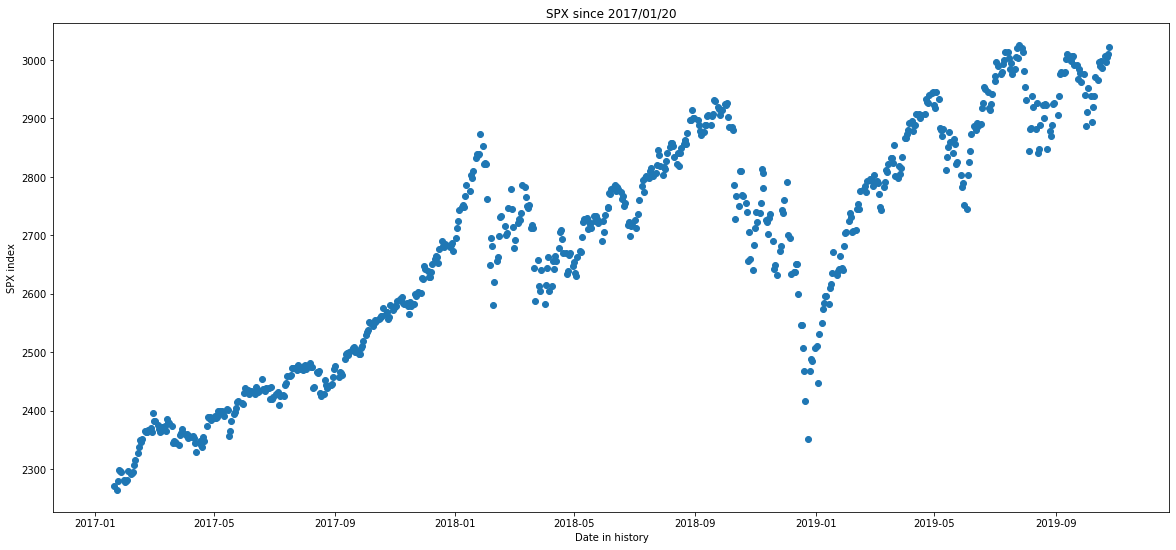

In [64]:
plt.figure(figsize=(20,9))
plt.scatter(df_SPX['Date'], df_SPX['Close'])
plt.title('SPX since 2017/01/20')
plt.xlabel('Date in history')
plt.ylabel('SPX index')
plt.show()




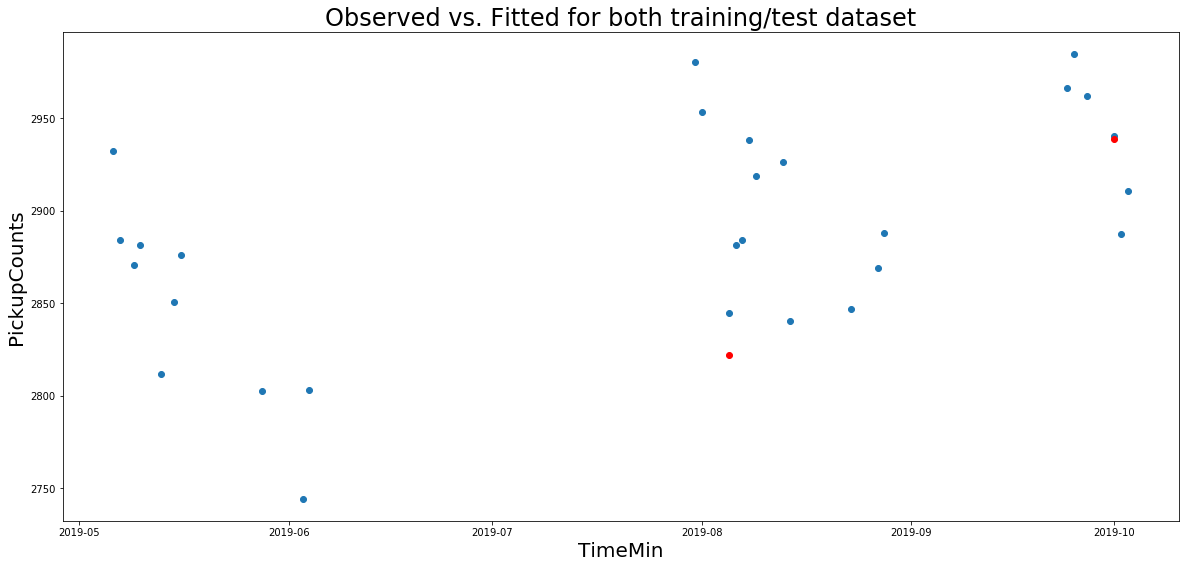

In [66]:
fig, axes = plt.subplots(1,1,figsize=(20,9))
plt.title('Observed vs. Fitted for both training/test dataset', fontsize = 24)

axes.plot(df_SPX_xx_2019_05['Date'], df_SPX_xx_2019_05['Close'], 'o')
axes.plot(df_SPX_tweet_2019_05['Date'], df_SPX_tweet_2019_05['Low'], 'o', color = 'r')

plt.xlabel('TimeMin', fontsize = 20)
plt.ylabel('PickupCounts', fontsize = 20)


plt.show()